# Dataset analysis
This notebook is intended to analyze the characteristics of the data that was used throughout our experiments in this repository

In [2]:
data_folder = "../data/"
lines = []

In [4]:
import glob

for filepath in glob.iglob(data_folder + '*'):
    with open(filepath, 'r') as f:
        for line in f.readlines():
            # The three values for each line are joined together with the tab '\t' character
            artist, title, lyrics = line.split('\t')
            
            # The lyrics are joined with a ' NEWLINE ' substring
            lyrics_list = lyrics.split(' NEWLINE ')
            # Since the cleanup doesn't work for the last line, we need to do this
            lyrics_list[-1] = lyrics_list[-1].replace(' NEWLINE\n', '')

            lines.append([artist, title, lyrics_list])

In [5]:
import pandas as pd
data = pd.DataFrame(lines, columns=['artist', 'title', 'lyrics'])

# Information about our data
## Number of songs

In [6]:
data

,artist,title,lyrics
0,Virgin Steele,Lion In Winter,"[Roaring against the dying light, The lion sta..."
1,Demi Lovato,Kiss This,"[I saw you on the front page of the letter, Sh..."
2,Indigo Girls,Andy,"[Andy, Do you love me, Do you think about it, ..."
3,Phil Collins,We're Sons Of Our Fathers,[It seems that family values have changed sinc...
4,Extreme,He Man Woman Hater,"[No Women Allowed!, Let me tell you about this..."
...,...,...,...
57645,Billy Joel,Billy The Kid,"[From a town known as Wheeling, West Virginia,..."
57646,Green Day,Restless Heart Syndrome,"[I've got a really bad disease, It's got me be..."
57647,Lynyrd Skynyrd,Searchin',"[I asked the wise man one sunny day, Can you h..."
57648,Kenny Chesney,Soul Of A Sailor,"[He walked in with a salty sway, Lookin' like ..."


## Numer of songs per artist
This also prints out the number of unique artists.

In [7]:
songs_per_artist = data.artist.sort_values().value_counts()
songs_per_artist

Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Cher                187
                   ... 
Exo-K                 2
U-Kiss                1
X-Treme               1
Zoe                   1
Zed                   1
Name: artist, Length: 643, dtype: int64

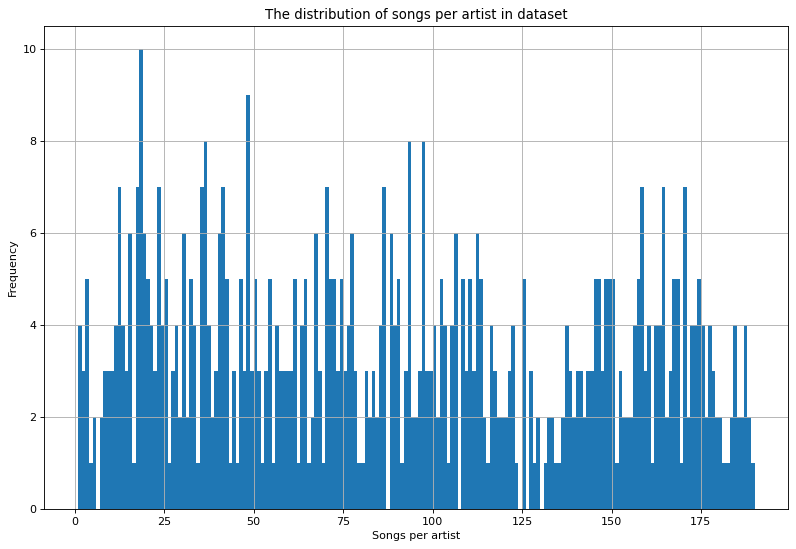

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)

values = songs_per_artist.values
n, bins, patches = plt.hist(values,bins=range(min(values), max(values)))

plt.xlabel('Songs per artist')
plt.ylabel('Frequency')
plt.title('The distribution of songs per artist in dataset')
plt.grid(True)
plt.show()

## Min, max, mean line length in lyrics
This is without any preprocessing, like lemmization or stemming. 

In [9]:
# Using spacy for tokenization
import spacy
nlp = spacy.load("en_core_web_sm")

# Funky loop, but basically what it does is first reads a song lyrics from 'data.lyrics'
# and then tokenizes each line using SpaCy's Tokenizer 'nlp'.
all_lyric_tokens = []
for i, lyrics in enumerate(data.lyrics):
    for line in lyrics:
        all_lyric_tokens.append(nlp(line.lower()))
    
    if i > 5000:
        break

In [11]:
import statistics

all_line_lengths = [len(line) for line in all_lyric_tokens]
print('Min:', min(all_line_lengths))
print('Max:', max(all_line_lengths))
print('Mean:', statistics.mean(all_line_lengths))

Min: 1
Max: 36
Mean: 7.258302413998442


## Number of lines in corpus

In [12]:
len(all_lyric_tokens)

174648

## Vocabulary size

In [13]:
from collections import Counter

vocabulary = Counter([token.text for line in all_lyric_tokens for token in line if not token.is_punct])
print('Vocabulary size:', len(vocabulary))
vocabulary.most_common()[:50]

Vocabulary size: 25588


[('i', 52750),
 ('the', 44144),
 ('you', 43064),
 ('to', 25517),
 ('and', 25488),
 ('a', 22855),
 ('it', 18988),
 ('me', 17953),
 ("'s", 16695),
 ('my', 15375),
 ("n't", 14995),
 ('in', 14744),
 ('of', 12406),
 ('that', 11934),
 ('do', 10808),
 ('your', 10388),
 ('on', 9923),
 ("'m", 9399),
 ('we', 8358),
 ('all', 8241),
 ('is', 8117),
 ('for', 8068),
 ('be', 7926),
 ('love', 7840),
 ('so', 6518),
 ('but', 6449),
 ('know', 6069),
 ('just', 5821),
 ('like', 5784),
 ('with', 5769),
 ("'re", 5676),
 ('no', 5363),
 ('oh', 5300),
 ("'ll", 5270),
 ('what', 5128),
 ('when', 5048),
 ('can', 5017),
 ('got', 5011),
 ('this', 4875),
 ('she', 4869),
 ('there', 4765),
 ('up', 4746),
 ('now', 4693),
 ('if', 4152),
 ('was', 4132),
 ('one', 4086),
 ('they', 4048),
 ('down', 3927),
 ('time', 3843),
 ('he', 3833)]

## Amount of non-English words
If any charachter is found in the lyrics that isn't ASCII, it's considered non-English. Not the best solution, but works for this.

In [14]:
non_english_tokens = [token for line in all_lyric_tokens for token in line if not token.is_ascii]
num_all_tokens = sum([len(line) for line in all_lyric_tokens])

print("Number of all tokens in corpus:", num_all_tokens)
print("Number of non-English tokens in corpus:", len(non_english_tokens))
print("% of non-English tokens in corpus:", 100 * len(non_english_tokens) / num_all_tokens, "%")
non_english_tokens[:100]

Number of all tokens in corpus: 1267648
Number of non-English tokens in corpus: 0
% of non-English tokens in corpus: 0.0 %


[]

## Distribution of number of lines per song

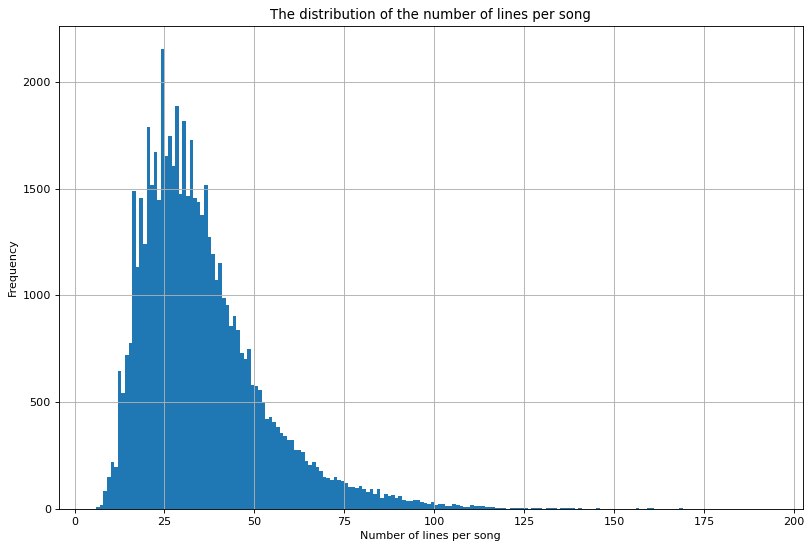

In [15]:
number_of_lines = data['lyrics'].apply(len).values

figure(figsize=(12, 8), dpi=80)

n, bins, patches = plt.hist(number_of_lines, bins=range(min(number_of_lines), max(number_of_lines)))

plt.xlabel('Number of lines per song')
plt.ylabel('Frequency')
plt.title('The distribution of the number of lines per song')
plt.grid(True)
plt.show()